### Import the basic packages

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the dataset

In [60]:
df = pd.read_csv("Zomato_Kolkata_Restaurants.csv")
df.head()

,Name,URL,Cuisines,Area,Timing,Full_Address,PhoneNumber,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
0,Jyoti Vihar,https://www.zomato.com/kolkata/jyoti-vihar-cam...,South Indian,"Camac Street Area, Kolkata",Opens tomorrow at 10am,"3A/1, Ho Chi Minh Sarani, Camac Street Area, K...",9.19748E+11,1,1,1,1,4.4,930,4.1,5498,South Indian Delicacies,"Milk Upma, Jyoti Vihar, Vada Sambar, Filtered ...","South Indian Food, Good Crowd, Excellent Place...",300
1,WOW! Momo,https://www.zomato.com/kolkata/wow-momo-park-s...,"Momos, Fast Food, Tibetan","Park Street Area, Kolkata",9am – 3am (Today),"57, Park Street, Beside Vodafone Store, Park S...",9.17604E+11,1,1,1,0,4,469,4.1,11100,NaN,"Tandoori Paneer Momos, Momo Platter, Chocolate...","Comfortable Seating Area, Staff Service, Famil...",350
2,Zam Zam,https://www.zomato.com/kolkata/zam-zam-park-ci...,"Biryani, Rolls","Park Circus Area, Kolkata",Opens at 12noon,"28/A, Syed Amir Ali Avenue, Park Circus Area, ...",9.19749E+11,1,1,1,0,4.4,1901,4.3,83100,NaN,"Beef Malai, Beef Bhuna, Hariyali Chicken, Sahi...","Ordering Process, Gastronomical Experience, Co...",500
3,Daily Bhoj,https://www.zomato.com/kolkata/daily-bhoj-topsia,Bengali,"Topsia, Kolkata",NaN,"139/1G, Tljala Road, Topsia, Kolkata",9.19331E+11,1,0,0,0,-,0,3.9,2260,NaN,NaN,"Great Portions, Worth the Money, Timely Servic...",150
4,Behnam,https://www.zomato.com/kolkata/behnam-topsia,"Biryani, North Indian, Mughlai, Rolls, Kebab, ...","Topsia, Kolkata",Opens at 11am,"139/1G, Tiljala Road, Near OYO Townhouse 229, ...",9.19331E+11,1,1,0,0,-,0,2.9,151,NaN,NaN,"Worth the Money, Timely Service, Great Portion...",200


### EDA

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              4923 non-null   object
 1   URL               4923 non-null   object
 2   Cuisines          4923 non-null   object
 3   Area              4923 non-null   object
 4   Timing            3281 non-null   object
 5   Full_Address      4923 non-null   object
 6   PhoneNumber       4923 non-null   object
 7   IsHomeDelivery    4923 non-null   int64 
 8   isTakeaway        4923 non-null   int64 
 9   isIndoorSeating   4923 non-null   int64 
 10  isVegOnly         4923 non-null   int64 
 11  Dinner Ratings    4923 non-null   object
 12  Dinner Reviews    4923 non-null   int64 
 13  Delivery Ratings  4923 non-null   object
 14  Delivery Reviews  4923 non-null   int64 
 15  KnownFor          199 non-null    object
 16  PopularDishes     1004 non-null   object
 17  PeopleKnownFor

### Drop the unnecessary columns

In [62]:
# drop the unnecessary column
df.drop(columns=['KnownFor','PopularDishes','PeopleKnownFor','Timing','URL','PhoneNumber'],inplace=True)


In [63]:
# Rechecking the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              4923 non-null   object
 1   Cuisines          4923 non-null   object
 2   Area              4923 non-null   object
 3   Full_Address      4923 non-null   object
 4   IsHomeDelivery    4923 non-null   int64 
 5   isTakeaway        4923 non-null   int64 
 6   isIndoorSeating   4923 non-null   int64 
 7   isVegOnly         4923 non-null   int64 
 8   Dinner Ratings    4923 non-null   object
 9   Dinner Reviews    4923 non-null   int64 
 10  Delivery Ratings  4923 non-null   object
 11  Delivery Reviews  4923 non-null   int64 
 12  AverageCost       4923 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 500.1+ KB


### Drop the duplicate retaurant if any

In [64]:
# Drop the duplicates in case of same restaurent name
print("Records before duplicates removal :",len(df))
df.drop_duplicates(subset=['Name','Full_Address'],inplace=True ,keep=False)
print("Records after duplicates removal :",len(df))

Records before duplicates removal : 4923
Records after duplicates removal : 4919


### Checking for null values

In [65]:
df.isna().sum().sum()

0

### Handling Cuisine for the restaurents

In [66]:
df['Cuisines'] = df['Cuisines'].str.lower()
df['Cuisines']

0                                            south indian
1                               momos, fast food, tibetan
2                                          biryani, rolls
3                                                 bengali
4       biryani, north indian, mughlai, rolls, kebab, ...
                              ...                        
4918                                     coffee, sandwich
4919    north indian, fast food, street food, beverage...
4920                                chinese, north indian
4921                       chinese, bengali, south indian
4922                                  mishti, street food
Name: Cuisines, Length: 4919, dtype: object

#### Creating a list of all the available cuisines

In [67]:

listi=[]
all_cuisines=[]
bag_of_cuisines = df['Cuisines'].tolist()
for cuisine in bag_of_cuisines:
    listi = cuisine.split(", ")
    for food in listi:
        all_cuisines.append(food)
 
all_cuisines

['south indian',
 'momos',
 'fast food',
 'tibetan',
 'biryani',
 'rolls',
 'bengali',
 'biryani',
 'north indian',
 'mughlai',
 'rolls',
 'kebab',
 'awadhi',
 'lucknowi',
 'biryani',
 'mughlai',
 'biryani',
 'mughlai',
 'north indian',
 'rolls',
 'kebab',
 'chinese',
 'momos',
 'desserts',
 'beverages',
 'biryani',
 'north indian',
 'kebab',
 'bengali',
 'pizza',
 'fast food',
 'beverages',
 'desserts',
 'burger',
 'fast food',
 'biryani',
 'desserts',
 'beverages',
 'pizza',
 'fast food',
 'desserts',
 'beverages',
 'ice cream',
 'desserts',
 'bakery',
 'desserts',
 'fast food',
 'mishti',
 'south indian',
 'street food',
 'chinese',
 'fast food',
 'north indian',
 'beverages',
 'bengali',
 'biryani',
 'north indian',
 'chinese',
 'fast food',
 'burger',
 'fast food',
 'beverages',
 'biryani',
 'kebab',
 'awadhi',
 'mughlai',
 'mishti',
 'desserts',
 'fast food',
 'street food',
 'biryani',
 'north indian',
 'rolls',
 'north indian',
 'fast food',
 'south indian',
 'street food',
 'c

In [68]:
def count_items(completeList):
    keys, counts = np.unique(completeList, return_counts=True)
    n= len(completeList)
    #create dictionary
    res = {keys[i]: counts[i] for i in range(len(keys))}
    res =dict(sorted(res.items(), key=lambda item: item[1] , reverse=True))
    return res
 
    


Checking for the most common cuisnes

In [69]:
res_list = count_items(all_cuisines)
print("No. of unique items :",len(res_list))

# Using top 20 items as recommended items

count = 0
for keys,values in res_list.items():
    if count == 30:
        break
    
    print(keys,"   ",values)
    count += 1
    

No. of unique items : 90
chinese     1888
north indian     1682
fast food     1655
beverages     1166
desserts     939
biryani     861
bengali     675
rolls     487
mughlai     449
sandwich     362
street food     342
shake     336
pizza     325
momos     304
kebab     303
continental     291
burger     287
bakery     275
south indian     274
italian     244
seafood     232
ice cream     223
mishti     141
asian     137
cafe     115
thai     109
pasta     108
healthy food     102
salad     77
tibetan     72


In [70]:
# Takign the first 40 items in this dictionary as the most prominent cuisines
count = 0
List_of_cuisine=[]
for keys,values in res_list.items():
    List_of_cuisine.append(keys)
    
List_of_cuisine.sort()

len(List_of_cuisine)
List_of_cuisine.remove('')
List_of_cuisine


['afghan',
 'american',
 'andhra',
 'arabian',
 'asian',
 'assamese',
 'awadhi',
 'bakery',
 'bangladeshi',
 'bar food',
 'bbq',
 'bengali',
 'beverages',
 'bihari',
 'biryani',
 'bubble tea',
 'burger',
 'burmese',
 'cafe',
 'cantonese',
 'chettinad',
 'chinese',
 'coffee',
 'continental',
 'desserts',
 'drinks only',
 'european',
 'fast food',
 'filipino',
 'finger food',
 'frozen yogurt',
 'goan',
 'greek',
 'gujarati',
 'healthy food',
 'hot dogs',
 'hyderabadi',
 'ice cream',
 'italian',
 'japanese',
 'juices',
 'kebab',
 'kerala',
 'korean',
 'lebanese',
 'lucknowi',
 'maharashtrian',
 'malaysian',
 'malwani',
 'mangalorean',
 'mediterranean',
 'mexican',
 'middle eastern',
 'mishti',
 'mithai',
 'modern indian',
 'momos',
 'mongolian',
 'mughlai',
 'naga',
 'nepalese',
 'north eastern',
 'north indian',
 'odia',
 'oriental',
 'paan',
 'parsi',
 'pasta',
 'pizza',
 'rajasthani',
 'roast chicken',
 'rolls',
 'russian',
 'salad',
 'sandwich',
 'seafood',
 'shake',
 'south indian',


### Modifying the Area 

In [71]:
# Now the Area
def modify_Area(txt):
    end_index = txt.index(", ")
    return txt[0:end_index]

#only once
df['Area'] = df['Area'].apply(modify_Area)


In [72]:
list_of_Area = df['Area']
list_of_Area 

# Calculating what places occurs how many times
dict_Important_Area = count_items(list_of_Area)
print("No of unique Area :",len(dict_Important_Area))
for key,values in dict_Important_Area.items():
    print(key,"  ",values)
    

No of unique Area : 143
New Town    347
Chinar Park    226
Baguihati    203
Behala    194
Sector 5    177
Tollygunge    177
Dum Dum    132
Kestopur    123
Jadavpur    122
Sector 1    114
Kasba    109
Park Circus Area    106
Ballygunge    103
Garia    92
Park Street Area    91
Bangur    80
Picnic Garden    78
New Alipore    76
Kaikhali    72
Kankurgachi    72
Naktala    71
Bhawanipur    64
Southern Avenue    64
Prince Anwar Shah Road    61
Topsia    61
Lake Town    59
Baghajatin    55
Jodhpur Park    55
Ruby Hospital Area    55
Elgin    49
Gariahat    48
Baranagar    47
Hatibagan    47
Kalikapur    45
Nagerbazar    44
Entally    39
Hindustan Park    39
Golf Green    38
Hazra    38
Santoshpur    37
Sector 2    37
Camac Street Area    35
Sector 3    35
Bara Bazar    34
Desapriya Park    34
Beliaghata    33
Kalighat    33
Sinthi    33
Dalhousie BBD Bagh    31
Taltala    31
Lake Market Area    30
New Market Area    30
City Centre 1    29
Golpark    28
Quest Mall    26
Shyam Bazar    26
Tang

### Modifying the other features

In [73]:
# Modifying the home delivery , Takeaway, indoor seating and veg only features

# Example 1: Replace values of columns by using dfFrame.loc[] property.
df.loc[df['IsHomeDelivery'] == 1, 'IsHomeDelivery'] = "homedelivery"
df.loc[df['IsHomeDelivery'] == 0, 'IsHomeDelivery'] = ""

df.loc[df['isIndoorSeating'] == 1, 'isIndoorSeating'] = 'indoorseating'
df.loc[df['isIndoorSeating'] == 0, 'isIndoorSeating'] = ""

df.loc[df['isTakeaway'] == 1, 'isTakeaway'] = 'takeaway'
df.loc[df['isTakeaway'] == 0, 'isTakeaway'] = ""

df.loc[df['isVegOnly'] == 1, 'isVegOnly'] = 'vegonly'
df.loc[df['isVegOnly'] == 0, 'isVegOnly'] = ""



In [74]:
df.head()

,Name,Cuisines,Area,Full_Address,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,AverageCost
0,Jyoti Vihar,south indian,Camac Street Area,"3A/1, Ho Chi Minh Sarani, Camac Street Area, K...",homedelivery,takeaway,indoorseating,vegonly,4.4,930,4.1,5498,300
1,WOW! Momo,"momos, fast food, tibetan",Park Street Area,"57, Park Street, Beside Vodafone Store, Park S...",homedelivery,takeaway,indoorseating,,4,469,4.1,11100,350
2,Zam Zam,"biryani, rolls",Park Circus Area,"28/A, Syed Amir Ali Avenue, Park Circus Area, ...",homedelivery,takeaway,indoorseating,,4.4,1901,4.3,83100,500
3,Daily Bhoj,bengali,Topsia,"139/1G, Tljala Road, Topsia, Kolkata",homedelivery,,,,-,0,3.9,2260,150
4,Behnam,"biryani, north indian, mughlai, rolls, kebab, ...",Topsia,"139/1G, Tiljala Road, Near OYO Townhouse 229, ...",homedelivery,takeaway,,,-,0,2.9,151,200


### Evaluating the reviews

In [75]:
# Changing the -  to 0
df.loc[df['Dinner Ratings'] == '-', 'Dinner Ratings'] = '0'
df.loc[df['Delivery Ratings'] == '-', 'Delivery Ratings'] = '0'
df['Delivery Ratings'] = df['Delivery Ratings'].astype(float)
df['Dinner Ratings'] = df['Dinner Ratings'].astype(float)

In [76]:
#  Calculating the weighted total rating
#  Total number of reviews
df['Total Reviews'] = df['Dinner Reviews'] + df['Delivery Reviews']
df['Total Reviews']


0        6428
1       11569
2       85001
3        2260
4         151
        ...  
4918        8
4919        0
4920        0
4921        0
4922      618
Name: Total Reviews, Length: 4919, dtype: int64

In [77]:
# For the weighted reviews
def Calculate_Rating(DinnerRating,DinnerReview,DeliveryRating,DeliveryReview):
    res = (DinnerRating * DinnerReview + DeliveryRating * DeliveryReview)/(DinnerReview + DeliveryReview)
    return res


df['Total Ratings'] = Calculate_Rating(DinnerRating=df['Delivery Ratings'],DinnerReview=df['Dinner Reviews'],DeliveryRating=df['Delivery Ratings'],DeliveryReview=df['Delivery Reviews'])
df['Total Ratings'] = df['Total Ratings'].replace(np.nan, 0)
df['Total Ratings']

0       4.1
1       4.1
2       4.3
3       3.9
4       2.9
       ... 
4918    0.0
4919    0.0
4920    0.0
4921    0.0
4922    4.4
Name: Total Ratings, Length: 4919, dtype: float64

#### Cost For One


In [78]:
df['AverageCost'].describe()

count    4919.000000
mean      340.872128
std       332.614496
min        50.000000
25%       150.000000
50%       250.000000
75%       400.000000
max      4000.000000
Name: AverageCost, dtype: float64

Cost ranges from 50 to 4000 with the mean value of 341
* Upper quartile : 400
* Lower Quartile : 150

In [79]:

# Change to cost category
# trying a range to get a good cost distribuition
def Give_Cost_Category(x):
    if(x > 0 and x < 180):
        return 'cheapeats'
    elif (x > 180 and x < 420):
        return 'midrange'
    else:
        return 'expensive'
    
df['Cost Category'] = df['AverageCost'].apply(Give_Cost_Category)

df['Cost Category']

0        midrange
1        midrange
2       expensive
3       cheapeats
4        midrange
          ...    
4918     midrange
4919    cheapeats
4920    cheapeats
4921     midrange
4922    cheapeats
Name: Cost Category, Length: 4919, dtype: object

In [80]:
# Understanding the proportions of cost category

df.groupby('Cost Category')['Name'].count()

Cost Category
cheapeats    1821
expensive    1160
midrange     1938
Name: Name, dtype: int64

### Understanding the distribuition of Cost

<Axes: xlabel='Cost Category'>

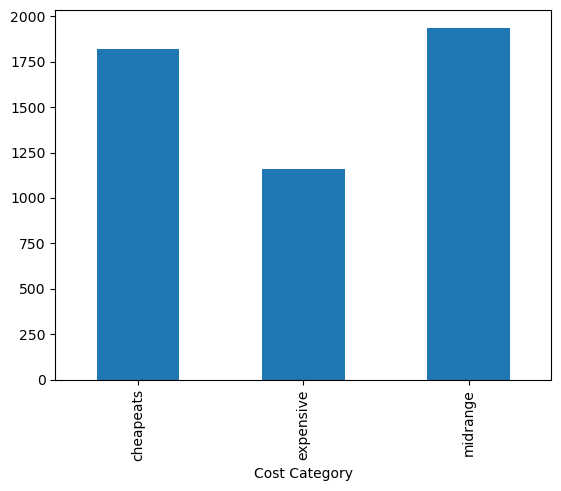

In [81]:
df.groupby('Cost Category')['Name'].count().plot.bar()

In [82]:
df.dropna()

,Name,Cuisines,Area,Full_Address,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,AverageCost,Total Reviews,Total Ratings,Cost Category
0,Jyoti Vihar,south indian,Camac Street Area,"3A/1, Ho Chi Minh Sarani, Camac Street Area, K...",homedelivery,takeaway,indoorseating,vegonly,4.4,930,4.1,5498,300,6428,4.1,midrange
1,WOW! Momo,"momos, fast food, tibetan",Park Street Area,"57, Park Street, Beside Vodafone Store, Park S...",homedelivery,takeaway,indoorseating,,4.0,469,4.1,11100,350,11569,4.1,midrange
2,Zam Zam,"biryani, rolls",Park Circus Area,"28/A, Syed Amir Ali Avenue, Park Circus Area, ...",homedelivery,takeaway,indoorseating,,4.4,1901,4.3,83100,500,85001,4.3,expensive
3,Daily Bhoj,bengali,Topsia,"139/1G, Tljala Road, Topsia, Kolkata",homedelivery,,,,0.0,0,3.9,2260,150,2260,3.9,cheapeats
4,Behnam,"biryani, north indian, mughlai, rolls, kebab, ...",Topsia,"139/1G, Tiljala Road, Near OYO Townhouse 229, ...",homedelivery,takeaway,,,0.0,0,2.9,151,200,151,2.9,midrange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,Nettare Cafe,"coffee, sandwich",Topsia,"86 B/1, Topsia Road, Topsia, Kolkata",homedelivery,,,,0.0,0,0.0,8,200,8,0.0,midrange
4919,Alphabite,"north indian, fast food, street food, beverage...",Entally,"20B, Flat A/3, 3rd Floor, Convent Road, Opposi...",homedelivery,,,,0.0,0,0.0,0,150,0,0.0,cheapeats
4920,Bidyut Jana Caterer,"chinese, north indian",Kankurgachi,"1, Greenchoo Building, Near Swasthya Bhawan, K...",homedelivery,takeaway,,,0.0,0,0.0,0,50,0,0.0,cheapeats
4921,Chowpatty,"chinese, bengali, south indian",Sealdah Area,"Complex 1, Beleghata Main Road, Sealdah Area, ...",homedelivery,takeaway,indoorseating,,0.0,0,0.0,0,300,0,0.0,midrange


In [83]:
# Adding the features
df['Features'] = df['IsHomeDelivery']+' '+df['isTakeaway']+' '+df['isVegOnly']+' '+df['isIndoorSeating']

In [84]:
# Drop some useless columns
df.drop(columns=['Dinner Ratings','Dinner Reviews','Delivery Reviews','Delivery Ratings'],inplace=True)


In [85]:
df.drop(columns=['IsHomeDelivery','isTakeaway','isIndoorSeating','isVegOnly'],inplace=True)


In [87]:
# After deleting the useless columns : the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4919 entries, 0 to 4922
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           4919 non-null   object 
 1   Cuisines       4919 non-null   object 
 2   Area           4919 non-null   object 
 3   Full_Address   4919 non-null   object 
 4   AverageCost    4919 non-null   int64  
 5   Total Reviews  4919 non-null   int64  
 6   Total Ratings  4919 non-null   float64
 7   Cost Category  4919 non-null   object 
 8   Features       4919 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 384.3+ KB


Completing the text processing for all the features and data

In [88]:
# import the required packages
from ast import literal_eval

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer



In [89]:
# download nltk packages
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [90]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [91]:
# Completing the text processing for all the features and data
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def process_sentences(text):
    temp_sent =[]

    # Tokenize words
    words = word_tokenize(text)
    
    for word in words: 
        # Remove stop words and non alphabet tokens
        if word not in stop_words and word.isalpha(): 
            temp_sent.append(word)

    # Some other clean-up
    full_sentence = ' '.join(temp_sent)
    
    return full_sentence

Creating a bag of words = processed cuisines + processed features + cost category

In [92]:
df['processed_cuisines']=df['Cuisines'].apply(process_sentences)
df['processed_features'] = df['Features'].apply(process_sentences)
df['bag_of_words'] = df['processed_cuisines'] + ' '+df['processed_features']+' '+df['Cost Category']
df['bag_of_words']

0       south indian homedelivery takeaway vegonly ind...
1       momos fast food tibetan homedelivery takeaway ...
2       biryani rolls homedelivery takeaway indoorseat...
3                          bengali homedelivery cheapeats
4       biryani north indian mughlai rolls kebab awadh...
                              ...                        
4918                coffee sandwich homedelivery midrange
4919    north indian fast food street food beverages m...
4920    chinese north indian homedelivery takeaway che...
4921    chinese bengali south indian homedelivery take...
4922    mishti street food homedelivery takeaway vegon...
Name: bag_of_words, Length: 4919, dtype: object

In [93]:
df.drop(columns=['processed_cuisines','processed_features'],inplace=True)


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4919 entries, 0 to 4922
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           4919 non-null   object 
 1   Cuisines       4919 non-null   object 
 2   Area           4919 non-null   object 
 3   Full_Address   4919 non-null   object 
 4   AverageCost    4919 non-null   int64  
 5   Total Reviews  4919 non-null   int64  
 6   Total Ratings  4919 non-null   float64
 7   Cost Category  4919 non-null   object 
 8   Features       4919 non-null   object 
 9   bag_of_words   4919 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 422.7+ KB


## Creating the Model for Recommendation system

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [96]:
def recommend_model1(description,Area):
    
    # Convert user input to lowercase
    description = description.lower()

    data = df.copy()
    
    data = data[data['Area'] == Area]
        
    
    # Process user description text input 
    description = process_sentences(description)
    description = description.strip()
    

    # Init a TF-IDF vectorizer
    tfidfvec = TfidfVectorizer()

    # Fit data on processed reviews
    vec = tfidfvec.fit(data["bag_of_words"])
    features = vec.transform(data["bag_of_words"])

    # Transform user input data based on fitted model
    description_vector =  vec.transform([description])

    # Calculate cosine similarities between users processed input and reviews
    cos_sim = linear_kernel(description_vector, features)

    # Add similarities to data frame
    data['similarity'] = cos_sim[0]

    # Sort data frame by similarities
    data.sort_values(by='similarity', ascending=False, inplace=True)

    return data[['Name', 'Area', 'Full_Address', 'AverageCost', 'Cuisines', 'Total Ratings', 'similarity']].head(5)

## Testing for various user input

In [97]:
# User input
user_choice_cuisine ='momos biryani'
user_choice_Features = 'indoorseating'
user_choice_CostCategory ='midrange'
user_choice_Area='Park Street Area'

description = user_choice_cuisine + ' ' + user_choice_Features+' '+user_choice_CostCategory


recommend_model1(description=description,Area=user_choice_Area)
                 



,Name,Area,Full_Address,AverageCost,Cuisines,Total Ratings,similarity
151,New Noodle King,Park Street Area,"51, Rafi Ahmed Kidwai Road, Park Street Area, ...",400,"chinese, seafood, momos",3.9,0.624491
632,Noodle Time,Park Street Area,"94A, Ripon Street, Park Street Area, Kolkata",400,"chinese, momos, seafood",4.0,0.624491
1,WOW! Momo,Park Street Area,"57, Park Street, Beside Vodafone Store, Park S...",350,"momos, fast food, tibetan",4.1,0.536630
262,The Biryani Mahal,Park Street Area,"54/2, Rafi Ahmed, Kidwai Road, Park Street Are...",400,"biryani, north indian",3.5,0.529519
10,KFC,Park Street Area,"20K, Park Street Area, Kolkata",400,"burger, fast food, biryani, desserts, beverages",4.2,0.382833


In [98]:
# User input
user_choice_cuisine ='chinese'
user_choice_Features = 'homedelivery'
user_choice_CostCategory ='expensive'
user_choice_Area='Sealdah Area'

description = user_choice_cuisine + ' ' + user_choice_Features+' '+user_choice_CostCategory


recommend_model1(description=description,Area=user_choice_Area)
                 

,Name,Area,Full_Address,AverageCost,Cuisines,Total Ratings,similarity
923,Foodcourt Restaurant,Sealdah Area,"167 N, BB Ganguly Street, Sealdah Area, Kolkata",600,"chinese, fast food",3.8,0.612212
747,China Express,Sealdah Area,"6, Mahatma Gandhi Road, Near Sealdah Area, Kol...",450,"chinese, seafood, beverages",0.0,0.572844
594,Danish Restaurant,Sealdah Area,"155/H/7, Ground & 1st Floor, Keshab Chandra Se...",500,"mughlai, north indian, chinese, kebab, rolls, ...",4.2,0.360557
4167,Sipsmart Cloud Kitchen,Sealdah Area,"2/H/22, Bipradas Street, Sealdah Area, Kolkata",150,"chinese, bakery",0.0,0.305055
888,Red Chillies,Sealdah Area,"128, Acharya Jagadish Chandra Bose Road, Seald...",400,"chinese, thai",4.1,0.269554


In [99]:
# User input
user_choice_cuisine ='Rolls biryani'
user_choice_Features = 'indoorseating takeaway'
user_choice_CostCategory ='midrange'
user_choice_Area='New Town'

description = user_choice_cuisine + ' ' + user_choice_Features+' '+user_choice_CostCategory


recommend_model1(description=description,Area=user_choice_Area)

,Name,Area,Full_Address,AverageCost,Cuisines,Total Ratings,similarity
2351,Zaiqa A-1,New Town,"East Beraberi, Main Road, Near Siddha Town Com...",300,"biryani, rolls",0.0,0.982421
2269,Al Baik Arsalan,New Town,"Canal Bank Road, New Town, Kolkata",200,"biryani, rolls",3.4,0.887889
2345,Shahi Khazana,New Town,"Shop A47, Unitech Gate 1, NKDA Market, New Tow...",300,"chinese, north indian, biryani, rolls",3.6,0.833169
2684,SBM Hungry Zone,New Town,"Opposite DLF, New Town, Kolkata",450,"chinese, rolls, biryani",0.0,0.769886
2702,Masterchef,New Town,"Hatiara Extention, Hatiara, Rajarhat, New Town...",300,"rolls, biryani, chinese",0.0,0.769354
